In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
df=pd.read_csv('amazon_india_2024.csv')
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2024_00000001,2024-01-03,CUST_2024_00003447,PROD_000387,OnePlus OnePlus 6 64GB White,Electronics,Smartphones,OnePlus,39348.44,0.00,39348.44,1,39348.44,0.0,39348.44,Chennai,Tamil Nadu,Metro,Premium,18-25,UPI,3,Standard,True,False,NaN,NaN,Delivered,1,2024,1,0.24,True,3.4
1,TXN_2024_00000002,2024-01-09,CUST_2018_00008611,PROD_001357,Nothing Phone (2a) Plus 64GB Blue,Electronics,Smartphones,Nothing,"18,694.97",0.00,18694.97,1,18694.97,0.0,18694.97,Mumbai,Maharashtra,Metro,Standard,36-45,UPI,1,Same Day,True,False,NaN,5.0,Delivered,1,2024,1,0.15,True,4.1
2,TXN_2024_00000003,2024-01-09,CUST_2024_00002076,PROD_001899,Xiaomi Watch Premium,Electronics,Smart Watch,Xiaomi,59276.71,17.19,49084.77,1,49084.77,0.0,49084.77,Chennai,Tamil Nadu,Metro,Premium,26-35,UPI,2,Express,True,False,NaN,NaN,Delivered,1,2024,1,0.06,TRUE,4.2
3,TXN_2024_00000004,2024-01-09,CUST_2024_00014530,PROD_000071,Xiaomi Redmi 2 32GB Black,Electronics,Smartphones,Xiaomi,32605.39,0.00,32605.39,1,32605.39,0.0,32605.39,Surat,Gujarat,Tier1,Budget,55+,UPI,4,Standard,False,False,NaN,5.0,Delivered,1,2024,1,0.20,True,3.7
4,TXN_2024_00000005,22-01-2024,CUST_2022_00043625,PROD_001144,OnePlus OnePlus 11R 256GB White,Electronics,Smartphones,OnePlus,72805.3,18.89,59048.74,1,59048.74,0.0,59048.74,Ahmedabad,Gujarat,Tier1,Standard,55+,COD,1,Same Day,True,True,Republic Day Sale,4.5,Delivered,1,2024,1,0.21,True,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121600,TXN_2024_00021368_DUP,31-03-2024,CUST_2024_00010041,PROD_000048,Samsung Galaxy J7 16GB White,Electronics,Smartphones,Samsung,27999.88,14.10,24052.51,1,24052.51,0.0,24052.51,Jaipur,Rajasthan,Tier1,Standard,18-25,UPI,3,Standard,True,False,NaN,4.5,Delivered,3,2024,1,0.19,False,4.6
121601,TXN_2024_00030811_DUP,2024-04-13,CUST_2024_00038545,PROD_000623,Oppo F11 64GB White,Electronics,Smartphones,Oppo,29256.3,0.00,29256.30,1,29256.30,0.0,29256.30,Indore,Madhya Pradesh,Tier1,Standard,NaN,UPI,1,Same Day,True,False,NaN,4.0,Returned,4,2024,2,0.22,True,4.6
121602,TXN_2024_00005850_DUP,2024-01-29,CUST_2016_00017631,PROD_001948,Noise Watch,Electronics,Smart Watch,Noise,33878.2,0.00,33878.20,1,33878.20,0.0,33878.20,Nagpur,Maharashtra,Tier1,Standard,18-25,UPI,3,Standard,False,False,NaN,5.0,Delivered,1,2024,1,0.06,True,3.3
121603,TXN_2024_00005559_DUP,2024-01-29,CUST_2024_00023947,PROD_001900,Xiaomi Watch Deluxe,Electronics,Smart Watch,Xiaomi,38806.15,27.19,28253.00,3,84758.99,0.0,84758.99,Allahabad,Uttar Pradesh,Rural,Standard,NaN,UPI,3,Standard,True,False,NaN,3.0,Delivered,1,2024,1,0.08,True,3.5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121605 entries, 0 to 121604
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          121605 non-null  object 
 1   order_date              121605 non-null  object 
 2   customer_id             121605 non-null  object 
 3   product_id              121605 non-null  object 
 4   product_name            121605 non-null  object 
 5   category                121605 non-null  object 
 6   subcategory             121605 non-null  object 
 7   brand                   121605 non-null  object 
 8   original_price_inr      121605 non-null  object 
 9   discount_percent        121605 non-null  float64
 10  discounted_price_inr    121605 non-null  float64
 11  quantity                121605 non-null  int64  
 12  subtotal_inr            121605 non-null  float64
 13  delivery_charges        111877 non-null  float64
 14  final_amount_inr    

#Question 1
Your dataset contains order_date in multiple formats: 'DD/MM/YYYY', 'DD-MM-YY', 'YYYY-MM-DD', and some invalid entries like '32/13/2020'. Clean and standardize all dates to 'YYYY-MM-DD' format, handling invalid dates appropriately.


In [3]:
df['order_date']=df['order_date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
df['order_date']

,order_date
0,2024-01-03
1,2024-01-09
2,2024-01-09
3,2024-01-09
4,22-01-2024
...,...
121600,31-03-2024
121601,2024-04-13
121602,2024-01-29
121603,2024-01-29


In [4]:
df['order_date'].isnull().sum()

np.int64(0)

In [5]:
mask = df['order_date'].str.match(r'^\d{4}-\d{2}-\d{2}$')

df.loc[mask,'order_date']=pd.to_datetime(df.loc[mask, 'order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2024-01-03 00:00:00
1,2024-01-09 00:00:00
2,2024-01-09 00:00:00
3,2024-01-09 00:00:00
4,22-01-2024
...,...
121600,31-03-2024
121601,2024-04-13 00:00:00
121602,2024-01-29 00:00:00
121603,2024-01-29 00:00:00


In [6]:
df['order_date']=pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2024-01-03
1,2024-01-09
2,2024-01-09
3,2024-01-09
4,NaT
...,...
121600,NaT
121601,2024-04-13
121602,2024-01-29
121603,2024-01-29


#Question 2
The original_price_inr column contains mixed data types: numeric values, text with '₹' symbols, comma separators ('₹1,25,000'), and some entries like 'Price on Request'. Clean this column to contain only numeric values in Indian Rupees.


In [7]:
df['original_price_inr']=df['original_price_inr'].str.replace(r'[^\d.]','',regex=True)
df['original_price_inr']=df['original_price_inr'].astype('float')
df['original_price_inr']

,original_price_inr
0,39348.44
1,18694.97
2,59276.71
3,32605.39
4,72805.30
...,...
121600,27999.88
121601,29256.30
121602,33878.20
121603,38806.15


In [8]:
df['original_price_inr'].isnull().sum()

np.int64(0)

#Question 3
Customer ratings appear in various formats: '5.0', '4 stars', '3/5', '2.5/5.0', and some missing values. Standardize all ratings to numeric scale 1.0-5.0, handling inconsistent formats and missing values strategically.


In [9]:
df['customer_rating'].unique()

array([nan, '5.0', '4.5', '3.5', '4.0', '4.0 stars', '4.5/5.0', '5.0/5.0',
       '3.0', '4/5', '3', '4', '3/5', '4.5 stars', '5', '3.0 stars',
       '5/5', '5.0 stars', '4.0/5.0', '3.5/5.0', '3.5 stars', '3.0/5.0'],
      dtype=object)

In [10]:
df['customer_rating']=df['customer_rating'].str.replace(r'[\/ ].*','',case=False,regex=True).str.strip()

In [11]:
df['customer_rating'].isnull().sum()

np.int64(36680)

In [12]:
df['customer_rating']=df['customer_rating'].replace('',np.nan)

In [13]:
df['customer_rating']=df['customer_rating'].astype(float)

In [14]:
df['customer_rating']

,customer_rating
0,NaN
1,5.0
2,NaN
3,5.0
4,4.5
...,...
121600,4.5
121601,4.0
121602,5.0
121603,3.0


In [15]:
df['customer_rating'].isnull().sum()

np.int64(36680)

In [16]:
df['customer_rating'].mean()
# df['customer_rating'].median()
# df['customer_rating'].mode()

np.float64(4.305451869296438)

In [17]:
df['customer_rating']=df['customer_rating'].fillna(df['customer_rating'].mean())

In [18]:
df['customer_rating'].isnull().sum()

np.int64(0)

#Question 4
The customer_city column has inconsistent naming: 'Bangalore/Bengaluru', 'Mumbai/Bombay', 'Delhi/New Delhi', along with spelling errors and case variations. Standardize all city names and handle geographical variations.


In [19]:
df['customer_city'].unique()

array(['Chennai', 'Mumbai', 'Surat', 'Ahmedabad', 'Delhi', 'Bhubaneswar',
       'Moradabad', 'Indore', 'Chandigarh', 'Pune', 'Jaipur', 'Aligarh',
       'Varanasi', 'Vadodara', 'Hyderabad', 'Nagpur', 'Coimbatore',
       'Bangalore', 'Visakhapatnam', 'Kochi', 'Allahabad', 'Meerut',
       'Kolkata', 'Lucknow', 'Saharanpur', 'Bareilly', 'Gorakhpur',
       'Ludhiana', 'Patna', 'Kanpur', 'Kolkata ', 'CHENNAI', 'New Delhi',
       'Bengaluru', 'Bengalore', 'kolkata', 'chenai', 'mumba',
       'Delhi NCR', 'delhi', 'DELHI', 'Bombay', 'KOLKATA', 'Madras',
       'Mumbai ', 'BANGALORE', 'Chennai ', 'Banglore', 'Calcutta',
       'MUMBAI'], dtype=object)

In [20]:
!pip install fuzzywuzzy

In [21]:
from fuzzywuzzy import process  # pip install thefuzz

def clean_city_names(df, column):

    manual_mapping = {
        # Mumbai
        'bombay': 'Mumbai',
        'mumba': 'Mumbai',
        'mumbai ': 'Mumbai',
        'mumabi': 'Mumbai',

        # Bengaluru
        'bangalore': 'Bengaluru',
        'banglore': 'Bengaluru',
        'bengalore': 'Bengaluru',

        # Delhi
        'new delhi': 'Delhi',
        'delhi ncr': 'Delhi',
        'delhi ': 'Delhi',

        # Chennai
        'madras': 'Chennai',
        'chenai': 'Chennai',
        'chennai ': 'Chennai',

        # Kolkata
        'calcutta': 'Kolkata',
        'kolkata ': 'Kolkata',
        'kolkata': 'Kolkata',  # lowercase variant
        'kolkatta': 'Kolkata',
    }

    master_list= [
        'Pune', 'Chandigarh', 'Ludhiana', 'Bengaluru', 'Kochi', 'Mumbai',
        'Kanpur', 'Patna', 'Bhubaneswar', 'Delhi', 'Nagpur', 'Indore',
        'Ahmedabad', 'Chennai', 'Kolkata', 'Gorakhpur', 'Visakhapatnam',
        'Hyderabad', 'Lucknow', 'Varanasi', 'Moradabad', 'Jaipur', 'Surat',
        'Coimbatore', 'Vadodara', 'Meerut', 'Aligarh', 'Bareilly', 'Saharanpur',
        'Allahabad'
    ]
    master_list_lower = [c.lower() for c in master_list]


    df[column] = df[column].astype(str).str.lower().str.strip()
    df[column] = df[column].replace({"nan": pd.NA})

    df[column] = df[column].replace(manual_mapping)

    def match_city(city):
        if pd.isna(city):
            return city
        best_match, score = process.extractOne(city, master_list_lower)
        return best_match if score > 85 else city

    df[column] = df[column].apply(match_city)


    df[column] = df[column].apply(lambda x: x.title() if pd.notna(x) else x)

    return df[column]


/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [22]:
# Get unique city names
unique_cities = df['customer_city'].unique()

# Apply the cleaning function to unique city names
cleaned_unique_cities = [clean_city_names(pd.DataFrame({'city': [city]}), 'city').iloc[0] for city in unique_cities]

# Create a mapping dictionary
city_mapping = dict(zip(unique_cities, cleaned_unique_cities))

# Map the cleaned names back to the original column
df['customer_city'] = df['customer_city'].map(city_mapping)

display(df['customer_city'].unique())

array(['Chennai', 'Mumbai', 'Surat', 'Ahmedabad', 'Delhi', 'Bhubaneswar',
       'Moradabad', 'Indore', 'Chandigarh', 'Pune', 'Jaipur', 'Aligarh',
       'Varanasi', 'Vadodara', 'Hyderabad', 'Nagpur', 'Coimbatore',
       'Bengaluru', 'Visakhapatnam', 'Kochi', 'Allahabad', 'Meerut',
       'Kolkata', 'Lucknow', 'Saharanpur', 'Bareilly', 'Gorakhpur',
       'Ludhiana', 'Patna', 'Kanpur'], dtype=object)

In [23]:
df['customer_city'].unique()

array(['Chennai', 'Mumbai', 'Surat', 'Ahmedabad', 'Delhi', 'Bhubaneswar',
       'Moradabad', 'Indore', 'Chandigarh', 'Pune', 'Jaipur', 'Aligarh',
       'Varanasi', 'Vadodara', 'Hyderabad', 'Nagpur', 'Coimbatore',
       'Bengaluru', 'Visakhapatnam', 'Kochi', 'Allahabad', 'Meerut',
       'Kolkata', 'Lucknow', 'Saharanpur', 'Bareilly', 'Gorakhpur',
       'Ludhiana', 'Patna', 'Kanpur'], dtype=object)

#Question 5
Boolean columns (is_prime_member, is_prime_eligible, is_festival_sale) contain mixed values: True/False, Yes/No, 1/0, Y/N, and some missing entries. Convert all boolean columns to consistent True/False format.


In [24]:
df['is_prime_member'].unique()

array(['True', 'False', 'TRUE', '1', 'No', '0', 'FALSE', 'Yes'],
      dtype=object)

In [25]:
df['is_prime_eligible'].unique()

array(['True', 'TRUE', 'Yes', 'False', '1', '0', 'FALSE', 'No'],
      dtype=object)

In [26]:
df['is_festival_sale'].unique()

array(['False', 'True', 'FALSE', '0', 'No', '1', 'TRUE', 'Yes'],
      dtype=object)

In [27]:
import pandas as pd

def make_true_false(x):

    if pd.isna(x):
        return pd.NA

    x = str(x).strip().upper()

    if x in ['NAN', 'NONE', 'NULL', '']:
        return pd.NA

    if x in ['NO', 'FALSE', '0']:
        return False
    elif x in ['YES', 'TRUE', '1']:
        return True

    return pd.NA


In [28]:
df['is_festival_sale']=df['is_festival_sale'].apply(make_true_false)
df['is_prime_eligible']=df['is_prime_eligible'].apply(make_true_false)
df['is_prime_member']=df['is_prime_member'].apply(make_true_false)

In [29]:
print(df['is_festival_sale'].unique())
print(df['is_prime_eligible'].unique())
print(df['is_prime_member'].unique())

[False  True]
[ True False]
[ True False]


#Question 6
Product categories have variations: 'Electronics/Electronic/ELECTRONICS/Electronics & Accessories'. Standardize category names across the dataset and ensure consistent naming conventions.


In [30]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories', 'Electronic',
       'ELECTRONICS', 'Electronicss'], dtype=object)

In [31]:
mapping_cat = {
    'electronics': 'Electronics',
    'electronic': 'Electronics',
    # 'Electronics & Accessories': 'Electronics',
    'ELECTRONICS':'Electronics',
    'Electronic':'Electronics',
    'Electronicss':'Electronics'

}

In [32]:
df['category']=df['category'].replace(mapping_cat)

In [33]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories'], dtype=object)

#Question 7
The delivery_days column contains negative values, text entries like 'Same Day', '1-2 days', and some unrealistic values like 50 days. Clean this column to contain only valid numeric delivery days.


In [34]:
df['delivery_days'].unique()

array(['3', '1', '2', '4', '5', '6', '7', '-1', '15', '1-2 days', '0',
       'Same Day', 'Express'], dtype=object)

In [35]:
df.loc[df['delivery_days'].str.contains(r'[1-2|same day]',case=False,na=False),'delivery_days'].sample(10)

,delivery_days
27779,2
116178,1
97602,1
68942,1
16083,1
870,1
27740,1
46378,2
78780,1
27513,1


In [36]:
df['delivery_days']=df['delivery_days'].str.replace('1-2','2',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Same Day','1',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Express','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('-','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('2 days','2',case=False)

In [37]:
df['delivery_days'] = df['delivery_days'].replace('', np.nan)
df['delivery_days'] = pd.to_numeric(df['delivery_days'], errors='coerce')
display(df['delivery_days'].unique())

array([ 3.,  1.,  2.,  4.,  5.,  6.,  7., 15.,  0., nan])

In [38]:
df['delivery_days'].isnull().sum()

np.int64(239)

In [39]:
df['delivery_days'] = df['delivery_days'].fillna(df['delivery_days'].mean()).astype(int)

In [40]:
df['delivery_days'].isnull().sum()


np.int64(0)

In [41]:
df['delivery_days'].head()

,delivery_days
0,3
1,1
2,2
3,4
4,1


#Question 8
Identify and handle duplicate transactions where the same customer, product, date, and amount appear multiple times. Some duplicates are genuine (bulk orders) while others are data errors. Develop a strategy to distinguish and handle both cases.


In [42]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
147,TXN_2024_00000148,2024-01-24,CUST_2017_00015387,PROD_001255,Samsung Galaxy S24 64GB Blue,Electronics,Smartphones,Samsung,91147.40,46.85,48445.24,2,96890.47,NaN,96890.47,Pune,Maharashtra,Tier1,Standard,18-25,UPI,3,Standard,False,True,Republic Day Sale,4.5,Delivered,1,2024,1,0.19,True,3.7
239,TXN_2024_00000240,2024-01-21,CUST_2024_00013783,PROD_000038,Samsung Galaxy Note 5 32GB Black,Electronics,Smartphones,Samsung,114388.93,28.65,81620.57,1,81620.57,0.0,81620.57,Bengaluru,Karnataka,Metro,Premium,18-25,COD,2,Express,True,True,Republic Day Sale,5.0,Delivered,1,2024,1,0.20,True,3.3
251,TXN_2024_00000252,NaT,CUST_2018_00013163,PROD_000990,Samsung Galaxy A53 64GB Black,Electronics,Smartphones,Samsung,25249.36,0.00,25249.36,1,25249.36,0.0,25249.36,Kochi,Kerala,Tier2,Standard,36-45,UPI,5,Standard,False,False,NaN,4.5,Delivered,1,2024,1,0.21,True,4.1
476,TXN_2024_00000477,2024-01-18,CUST_2024_00001609,PROD_000925,Vivo Y33s 256GB White,Electronics,Smartphones,Vivo,15845.53,0.00,15845.53,1,15845.53,0.0,15845.53,Mumbai,Maharashtra,Metro,Budget,36-45,UPI,4,Standard,False,False,NaN,4.0,Delivered,1,2024,1,0.18,True,3.7
633,TXN_2024_00000634,2024-01-24,CUST_2024_00006393,PROD_000299,Vivo V7+ 64GB Black,Electronics,Smartphones,Vivo,17561.00,33.40,11695.04,1,11695.04,0.0,11695.04,Bareilly,Uttar Pradesh,Rural,Budget,18-25,Credit Card,4,Standard,False,True,Republic Day Sale,5.0,Delivered,1,2024,1,0.18,True,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121600,TXN_2024_00021368_DUP,NaT,CUST_2024_00010041,PROD_000048,Samsung Galaxy J7 16GB White,Electronics,Smartphones,Samsung,27999.88,14.10,24052.51,1,24052.51,0.0,24052.51,Jaipur,Rajasthan,Tier1,Standard,18-25,UPI,3,Standard,True,False,NaN,4.5,Delivered,3,2024,1,0.19,False,4.6
121601,TXN_2024_00030811_DUP,2024-04-13,CUST_2024_00038545,PROD_000623,Oppo F11 64GB White,Electronics,Smartphones,Oppo,29256.30,0.00,29256.30,1,29256.30,0.0,29256.30,Indore,Madhya Pradesh,Tier1,Standard,NaN,UPI,1,Same Day,True,False,NaN,4.0,Returned,4,2024,2,0.22,True,4.6
121602,TXN_2024_00005850_DUP,2024-01-29,CUST_2016_00017631,PROD_001948,Noise Watch,Electronics,Smart Watch,Noise,33878.20,0.00,33878.20,1,33878.20,0.0,33878.20,Nagpur,Maharashtra,Tier1,Standard,18-25,UPI,3,Standard,False,False,NaN,5.0,Delivered,1,2024,1,0.06,True,3.3
121603,TXN_2024_00005559_DUP,2024-01-29,CUST_2024_00023947,PROD_001900,Xiaomi Watch Deluxe,Electronics,Smart Watch,Xiaomi,38806.15,27.19,28253.00,3,84758.99,0.0,84758.99,Allahabad,Uttar Pradesh,Rural,Standard,NaN,UPI,3,Standard,True,False,NaN,3.0,Delivered,1,2024,1,0.08,True,3.5


In [43]:
df=df.drop_duplicates(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'],keep='first')

In [44]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


#Question 9
The dataset contains outlier prices where some products show prices 100x higher than expected due to data entry errors (decimal point issues). Identify and correct these outliers using statistical methods and domain knowledge.


In [45]:
df.loc[:,['product_name','original_price_inr']]

,product_name,original_price_inr
0,OnePlus OnePlus 6 64GB White,39348.44
1,Nothing Phone (2a) Plus 64GB Blue,18694.97
2,Xiaomi Watch Premium,59276.71
3,Xiaomi Redmi 2 32GB Black,32605.39
4,OnePlus OnePlus 11R 256GB White,72805.30
...,...,...
120995,OnePlus OnePlus 3 16GB Blue,64261.89
120996,Oppo A52 128GB Black,20085.76
120997,Apple iPhone 15 Pro 128GB White,264588.38
120998,Xiaomi Poco F5 64GB Black,26051.45


In [46]:
df['original_price_inr']

,original_price_inr
0,39348.44
1,18694.97
2,59276.71
3,32605.39
4,72805.30
...,...
120995,64261.89
120996,20085.76
120997,264588.38
120998,26051.45


<Axes: >

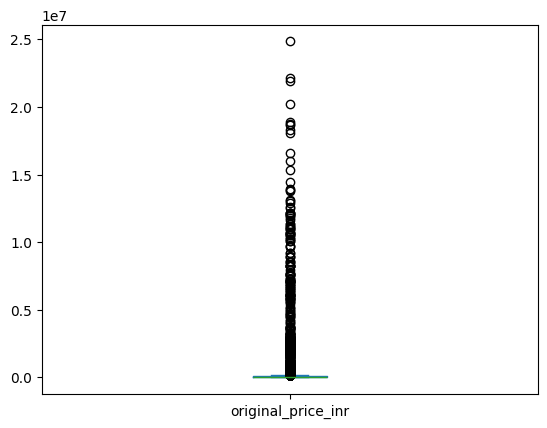

In [47]:
df['original_price_inr'].plot(kind='box')

In [48]:
df['original_price_inr'].describe()

,original_price_inr
count,1.210000e+05
mean,6.819214e+04
std,3.472565e+05
min,1.073980e+03
25%,2.406999e+04
50%,3.641510e+04
75%,7.376359e+04
max,2.485294e+07


In [49]:
Q1=df['original_price_inr'].quantile(0.25)
Q3=df['original_price_inr'].quantile(0.75)
Q3,Q1

(np.float64(73763.59), np.float64(24069.99))

In [50]:
IQR=Q3-Q1
IQR

np.float64(49693.59999999999)

In [51]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [52]:
lower_limit,upper_limit

(np.float64(-50470.40999999999), np.float64(148303.99))

In [53]:
df[((df['original_price_inr'] < lower_limit) | (df['original_price_inr'] > upper_limit))]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
28,TXN_2024_00000029,2024-01-20,CUST_2024_00025442,PROD_000999,OnePlus OnePlus 10 Pro 256GB Black,Electronics,Smartphones,OnePlus,615353.30,64.92,21585.95,1,21585.95,0.0,21585.95,Coimbatore,Tamil Nadu,Tier2,Standard,36-45,Credit Card,1,Same Day,True,True,Republic Day Sale,3.500000,Delivered,1,2024,1,0.18,True,4.7
99,TXN_2024_00000100,2024-01-19,CUST_2022_00000204,PROD_000484,Apple iPhone 11 256GB White,Electronics,Smartphones,Apple,167407.74,0.00,167407.74,1,167407.74,0.0,167407.74,Chennai,Tamil Nadu,Metro,Premium,18-25,UPI,2,Express,True,False,NaN,4.500000,Delivered,1,2024,1,0.19,True,3.9
100,TXN_2024_00000101,NaT,CUST_2018_00027044,PROD_001244,Apple iPhone 16 Plus 256GB Black,Electronics,Smartphones,Apple,255034.33,48.47,131429.47,1,131429.47,0.0,131429.47,Delhi,Delhi,Metro,Premium,18-25,COD,2,Express,True,True,Republic Day Sale,5.000000,Delivered,1,2024,1,0.15,True,4.5
102,TXN_2024_00000103,NaT,CUST_2021_00017841,PROD_000952,Apple iPhone 14 128GB Blue,Electronics,Smartphones,Apple,253257.50,5.53,239243.15,2,478486.30,0.0,478486.30,Bengaluru,Karnataka,Metro,Premium,NaN,UPI,1,Same Day,True,False,NaN,4.000000,Delivered,1,2024,1,0.19,True,4.4
152,TXN_2024_00000153,2024-01-01,CUST_2019_00002414,PROD_001706,Lenovo Galaxy Tab 4GB RAM Silver,Electronics,Tablets,Lenovo,512765.50,0.00,51276.55,1,51276.55,0.0,51276.55,Chennai,Tamil Nadu,Metro,Standard,18-25,Debit Card,5,Standard,False,False,NaN,4.500000,Delivered,1,2024,1,0.50,True,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120934,TXN_2024_00120935,2024-12-20,CUST_2024_00024725,PROD_000963,Apple iPhone 14 Plus 64GB Black,Electronics,Smartphones,Apple,153136.36,0.00,153136.36,2,306272.72,0.0,306272.72,Delhi,Delhi,Metro,Premium,26-35,Credit Card,1,Same Day,True,False,NaN,4.305452,Delivered,12,2024,4,0.16,False,4.4
120951,TXN_2024_00120952,2024-12-21,CUST_2022_00014972,PROD_001652,Alienware Inspiron 4GB RAM Black,Electronics,Laptops,Alienware,202857.80,23.32,155552.88,1,155552.88,0.0,155552.88,Visakhapatnam,Andhra Pradesh,Tier2,Premium,26-35,Debit Card,2,Express,True,False,NaN,4.305452,Delivered,12,2024,4,1.62,True,4.6
120955,TXN_2024_00120956,2024-12-02,CUST_2019_00022225,PROD_000226,Apple iPhone 8 Plus 64GB White,Electronics,Smartphones,Apple,161682.94,0.00,161682.94,1,161682.94,0.0,161682.94,Ahmedabad,Gujarat,Tier1,Premium,18-25,BNPL,5,Standard,False,False,NaN,4.305452,Delivered,12,2024,4,0.17,True,3.2
120987,TXN_2024_00120988,2024-12-29,CUST_2016_00011484,PROD_001684,Apple Mi Pad 8GB RAM Black,Electronics,Tablets,Apple,165791.87,0.00,165791.87,3,497375.61,0.0,497375.61,Chennai,Tamil Nadu,Metro,Premium,18-25,UPI,7,Standard,False,False,NaN,4.000000,Returned,12,2024,4,0.42,True,3.3


In [54]:
df=df[(df['original_price_inr']>=lower_limit)&(df['original_price_inr']<=upper_limit)]

In [55]:
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2024_00000001,2024-01-03,CUST_2024_00003447,PROD_000387,OnePlus OnePlus 6 64GB White,Electronics,Smartphones,OnePlus,39348.44,0.00,39348.44,1,39348.44,0.0,39348.44,Chennai,Tamil Nadu,Metro,Premium,18-25,UPI,3,Standard,True,False,NaN,4.305452,Delivered,1,2024,1,0.24,True,3.4
1,TXN_2024_00000002,2024-01-09,CUST_2018_00008611,PROD_001357,Nothing Phone (2a) Plus 64GB Blue,Electronics,Smartphones,Nothing,18694.97,0.00,18694.97,1,18694.97,0.0,18694.97,Mumbai,Maharashtra,Metro,Standard,36-45,UPI,1,Same Day,True,False,NaN,5.000000,Delivered,1,2024,1,0.15,True,4.1
2,TXN_2024_00000003,2024-01-09,CUST_2024_00002076,PROD_001899,Xiaomi Watch Premium,Electronics,Smart Watch,Xiaomi,59276.71,17.19,49084.77,1,49084.77,0.0,49084.77,Chennai,Tamil Nadu,Metro,Premium,26-35,UPI,2,Express,True,False,NaN,4.305452,Delivered,1,2024,1,0.06,True,4.2
3,TXN_2024_00000004,2024-01-09,CUST_2024_00014530,PROD_000071,Xiaomi Redmi 2 32GB Black,Electronics,Smartphones,Xiaomi,32605.39,0.00,32605.39,1,32605.39,0.0,32605.39,Surat,Gujarat,Tier1,Budget,55+,UPI,4,Standard,False,False,NaN,5.000000,Delivered,1,2024,1,0.20,True,3.7
4,TXN_2024_00000005,NaT,CUST_2022_00043625,PROD_001144,OnePlus OnePlus 11R 256GB White,Electronics,Smartphones,OnePlus,72805.30,18.89,59048.74,1,59048.74,0.0,59048.74,Ahmedabad,Gujarat,Tier1,Standard,55+,COD,1,Same Day,True,True,Republic Day Sale,4.500000,Delivered,1,2024,1,0.21,True,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120994,TXN_2024_00120995,2024-12-04,CUST_2024_00009750,PROD_000747,Realme Realme X50 Pro 128GB White,Electronics,Smartphones,Realme,21385.86,0.00,21385.86,1,21385.86,0.0,21385.86,Indore,Madhya Pradesh,Tier1,Standard,NaN,COD,5,Standard,False,False,NaN,5.000000,Cancelled,12,2024,4,0.17,True,3.3
120995,TXN_2024_00120996,2024-12-11,CUST_2024_00003671,PROD_000161,OnePlus OnePlus 3 16GB Blue,Electronics,Smartphones,OnePlus,64261.89,0.00,64261.89,1,64261.89,0.0,64261.89,Vadodara,Gujarat,Tier2,Standard,18-25,Net Banking,3,Standard,False,False,NaN,4.000000,Cancelled,12,2024,4,0.20,True,4.3
120996,TXN_2024_00120997,2024-12-21,CUST_2024_00026645,PROD_000783,Oppo A52 128GB Black,Electronics,Smartphones,Oppo,20085.76,0.00,20085.76,1,20085.76,0.0,20085.76,Patna,Bihar,Tier2,Budget,26-35,COD,1,Same Day,True,False,NaN,3.500000,Delivered,12,2024,4,0.25,True,4.4
120998,TXN_2024_00120999,2024-12-06,CUST_2024_00006010,PROD_001161,Xiaomi Poco F5 64GB Black,Electronics,Smartphones,Xiaomi,26051.45,0.00,26051.45,1,26051.45,0.0,26051.45,Varanasi,Uttar Pradesh,Rural,Budget,NaN,COD,7,Standard,False,False,NaN,4.500000,Delivered,12,2024,4,0.20,True,4.2


#Question 10
Payment methods contain inconsistent naming: 'UPI/PhonePe/GooglePay', 'Credit Card/CREDIT_CARD/CC', 'Cash on Delivery/COD/C.O.D'. Standardize payment method categories and create a clean categorical hierarchy.


In [56]:
df['payment_method'].unique()

array(['UPI', 'COD', 'Debit Card', 'Credit Card', 'BNPL', 'Wallet',
       'Net Banking'], dtype=object)

In [57]:
mapping_payment_method = {
    'COD': 'Cash',
    'UPI': 'UPI',
    'Debit Card': 'Card',
    'Credit Card': 'Card',
    'Net Banking': 'Online Banking',
    'Wallet': 'Wallet',
    'BNPL': 'BNPL'
}

df['payment_method'] = df['payment_method'].replace(mapping_payment_method)

In [58]:
df['payment_method'].unique()

array(['UPI', 'Cash', 'Card', 'BNPL', 'Wallet', 'Online Banking'],
      dtype=object)

In [59]:
df.isnull().sum()

,0
transaction_id,0
order_date,10987
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [60]:
df['delivery_charges'].sample(10)

,delivery_charges
92352,0.0
10872,0.0
117396,0.0
70916,0.0
105361,0.0
81850,0.0
105556,NaN
59371,0.0
12885,NaN
32098,0.0


In [61]:
df['delivery_charges'].isnull().sum()

np.int64(9233)

In [62]:
df['delivery_charges']=df['delivery_charges'].fillna(df['delivery_charges'].mean())

In [63]:
df['customer_age_group'].unique()

array(['18-25', '36-45', '26-35', '55+', nan, '46-55'], dtype=object)

In [64]:
mapping_age_group = {
    '18-25': 'Group-1',
    '26-35': 'Group-2',
    '36-45': 'Group-3',
    '46-55': 'Group-4',
    '55+':   'Group-5'
}

df['customer_age_group'] = df['customer_age_group'].replace(mapping_age_group)

In [65]:
df['customer_age_group'].unique()

array(['Group-1', 'Group-3', 'Group-2', 'Group-5', nan, 'Group-4'],
      dtype=object)

In [66]:
# df['customer_age_group'].mode()[0]
df['customer_age_group']=df['customer_age_group'].fillna(df['customer_age_group'].mode()[0])

In [67]:
df['customer_age_group'].isnull().sum()

np.int64(0)

In [68]:
df.isnull().sum()

,0
transaction_id,0
order_date,10987
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [69]:
df=df.drop(columns=['festival_name'])

In [70]:
df.isnull().sum()

,0
transaction_id,0
order_date,10987
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115540 entries, 0 to 120999
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          115540 non-null  object        
 1   order_date              104553 non-null  datetime64[ns]
 2   customer_id             115540 non-null  object        
 3   product_id              115540 non-null  object        
 4   product_name            115540 non-null  object        
 5   category                115540 non-null  object        
 6   subcategory             115540 non-null  object        
 7   brand                   115540 non-null  object        
 8   original_price_inr      115540 non-null  float64       
 9   discount_percent        115540 non-null  float64       
 10  discounted_price_inr    115540 non-null  float64       
 11  quantity                115540 non-null  int64         
 12  subtotal_inr            115540 non-

In [72]:
df.to_csv('cleaned_2024.csv')